In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Step 1 - understanding the data

train_df = pd.read_csv('/Users/seanbunk/Documents/CodingTemple/txt_&_csv/titanic/train.csv')
test_df = pd.read_csv('/Users/seanbunk/Documents/CodingTemple/txt_&_csv/titanic/test.csv')

combined_df = [train_df, test_df]

In [43]:
# Looking at the data
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [44]:
train_df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [45]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [46]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
train_df.describe()
# Survived is a boolean 0 = False, 1 = True
# Most passengers did not travel as parents with children
# The average survival rate is 38%
# The averaage age is 29-30 years old

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
train_df.describe(include = ['O'])
# parameter specifies that only columns with object data type

# More males on the Titanic
# Ticket numbers have a high duplicate values with only 210 being original
# there are 3 unique values  and the S port is the most usedkak

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [49]:
train_df.isnull().sum().sort_values

<bound method Series.sort_values of PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64>

In [50]:
# categorical values are : 'Survived', 'Pclass', 'Sex', 'Ticket','Cabin', 'Embarked'
# numerical values are : 'Age', 'SibSp', 'Parch', 'Fare'

In [51]:
train_df["Sex"].value_counts()
# No NA values

male      577
female    314
Name: Sex, dtype: int64

In [52]:
sex_survived = train_df[['Sex', 'Survived']].groupby('Sex').mean()
sex_survived

# Females have a signficantly higher survival rate

,Survived
Sex,
female,0.742038
male,0.188908


TypeError: 'str' object is not callable

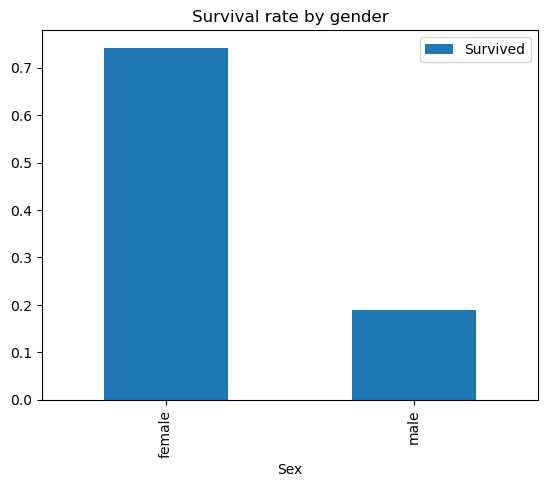

In [82]:
sex_survived.plot(kind = 'bar')
plt.title('Survival rate by gender')
plt.xlabel('Sex')
plt.ylabel('Survival')
plt.show()
# Females have a significantly higher survival rate

In [56]:
train_df['Embarked'].value_counts(dropna = False)

# 2 NA values

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [57]:
# calculating the average survival rate by embarkation point

embarked_survived = train_df[['Embarked', 'Survived']].groupby(['Embarked']).mean()
embarked_survived

# Those who were in location C is the highest and location S being the lowest

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


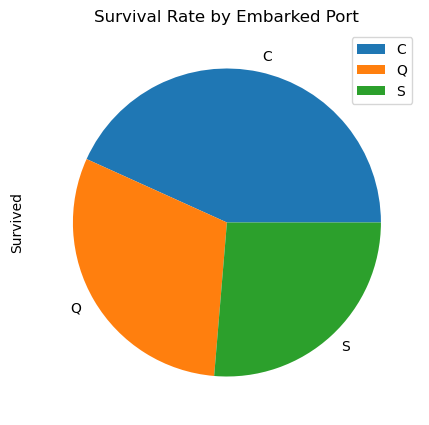

In [58]:
embarked_survived.plot(kind = 'pie', y = 'Survived' ,figsize = (5,5) )
plt.title('Survival Rate by Embarked Port')
plt.legend(labels=embarked_survived.index, loc='best')
plt.show()
# Location C has the best survived rate

In [59]:
train_df['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [60]:
# Calculate the average survival rate by passenger class
pclass_survived = train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean() 
pclass_survived

# Pclass 1 has the highest survival rate and Pclass 3 has the lowest

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


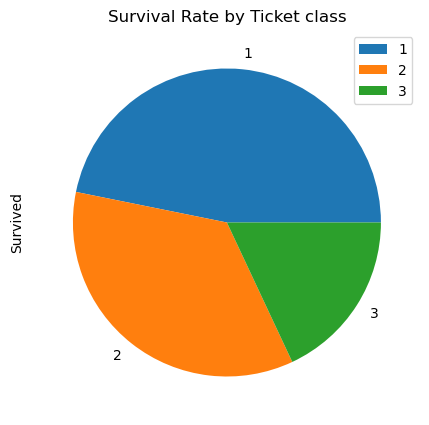

In [61]:
pclass_survived.plot(kind = 'pie', y = 'Survived', figsize = (5,5))
plt.title('Survival Rate by Ticket class')
plt.show() 
# first class have a higher survival rate

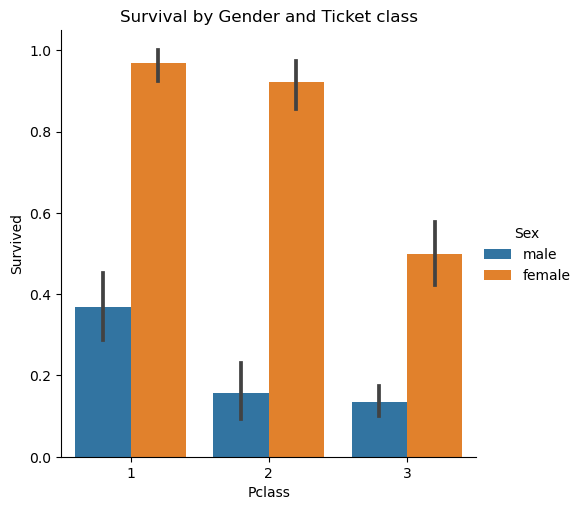

In [62]:
#Calculate survival by gender and Pclass
gender_pclass = sns.catplot( x= 'Pclass', y = 'Survived', hue = 'Sex', 
                               data = train_df, kind = 'bar')
plt.ylabel = ('Survival')
plt.title('Survival by Gender and Ticket class')
plt.show()

# The Males in Pclass 1 had the highest survival rate amongst men, and the Females in both Pclass 1 and 2 have
# the higher survival rate then those in Pclass 3.

In [63]:
# Comparing Survival on these categorical values using pivot tables:
# Sex
print(pd.pivot_table(data = train_df, index = 'Survived', columns = 'Sex', values = 'Ticket', aggfunc = 'count'))
print('-'*50)
# Embarked
print(pd.pivot_table(data = train_df, index = 'Survived', columns = 'Embarked', values = 'Ticket', aggfunc =
                    'count'))
print('-'*50)
# Pclass
print(pd.pivot_table(data = train_df, index = 'Survived', columns = 'Pclass', values = 'Ticket',
                     aggfunc = 'count'))

Sex       female  male
Survived              
0             81   468
1            233   109
--------------------------------------------------
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217
--------------------------------------------------
Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


In [64]:
cabin_col = train_df.loc[:,'Cabin']
cabin_col.head(10)
# mostly NaN values

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [65]:
cabin_survived = train_df[['Cabin', 'Survived']].groupby(['Cabin']).mean() 
cabin_survived

,Survived
Cabin,
A10,0.0
A14,0.0
A16,1.0
A19,0.0
A20,1.0
...,...
F33,1.0
F38,0.0
F4,1.0


In [66]:
ticket_col = train_df.loc[:,'Ticket']
ticket_col.tail(10)
# most tickets are numerical, with a few containing letters

881              349257
882                7552
883    C.A./SOTON 34068
884     SOTON/OQ 392076
885              382652
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, dtype: object

In [67]:
ticket_survived = train_df[['Ticket', 'Survived']].groupby(['Ticket']).mean() 
ticket_survived

,Survived
Ticket,
110152,1.000000
110413,0.666667
110465,0.000000
110564,1.000000
110813,1.000000
...,...
W./C. 6608,0.000000
W./C. 6609,0.000000
W.E.P. 5734,0.000000


In [68]:
name_col = train_df.loc[:,'Name']
name_col.head(10)
# Most names are unique

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [69]:
names_survived = train_df[['Name', 'Survived']].groupby(['Name']).mean() 
names_survived

,Survived
Name,
"Abbing, Mr. Anthony",0.0
"Abbott, Mr. Rossmore Edward",0.0
"Abbott, Mrs. Stanton (Rosa Hunt)",1.0
"Abelson, Mr. Samuel",0.0
"Abelson, Mrs. Samuel (Hannah Wizosky)",1.0
...,...
"de Mulder, Mr. Theodore",1.0
"de Pelsmaeker, Mr. Alfons",0.0
"del Carlo, Mr. Sebastiano",0.0


In [70]:
# Dropping and filling missing values from Ticket, Cabin, and Name
# Fill the missing data with the mean for categorical data, or median value if it's a numerical variable. 
# Filling the missing data with mode if it's a categorical value.
train_df = train_df.drop(['Ticket','Cabin', 'Name'], axis = 1)

In [71]:
train_df.isnull().sum().sort_values()


PassengerId      0
Survived         0
Pclass           0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         2
Age            177
dtype: int64

In [72]:
# Find the most frequent value of Embarked

embarked_mode = train_df['Embarked'].dropna().mode()[0]
embarked_mode

'S'

In [73]:
train_df['Embarked'].fillna(embarked_mode, inplace = True)
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [74]:
avg_age = train_df['Age'].dropna().mode()[0]  #average age of the passengers is 24
avg_age

24.0

In [75]:
train_df['Age'].fillna(avg_age, inplace = True)
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Fare'>

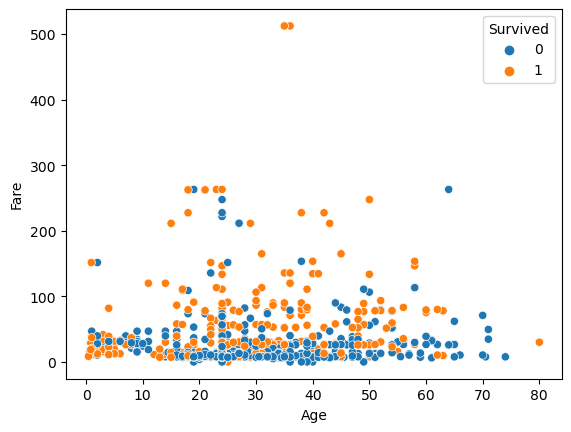

In [76]:
sns.scatterplot(x = 'Age', y = 'Fare', data = train_df, hue = 'Survived')
# those who spent more money for their ticket has a higher survival rate, as well as those who are below 50 years
# old

In [77]:
# Sibsp column count
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [78]:
train_df[['SibSp', 'Survived']].groupby('SibSp').mean()
# Those with 2 or less SibSp have a higher survival rate

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


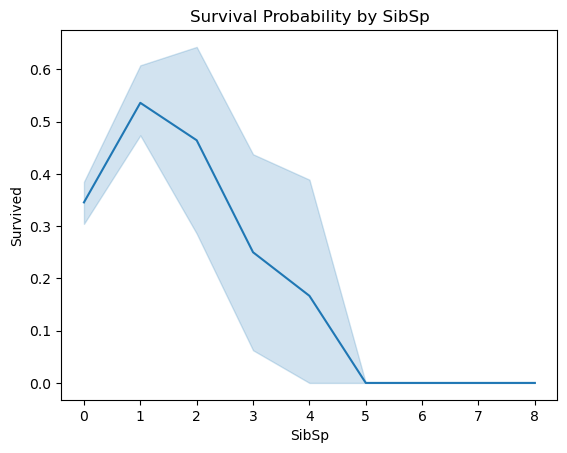

In [79]:
sns.lineplot(x = 'SibSp', y = 'Survived', data = train_df)
plt.title('Survival Probability by SibSp')
plt.show()

In [80]:
train_df['Parch'].value_counts().sort_values(ascending = False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [55]:
train_df[['Parch', 'Survived']].groupby('Parch').mean().sort_values(by = 'Survived', ascending = False)
# parents with 3 or less SibSp have a higher survival rate

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

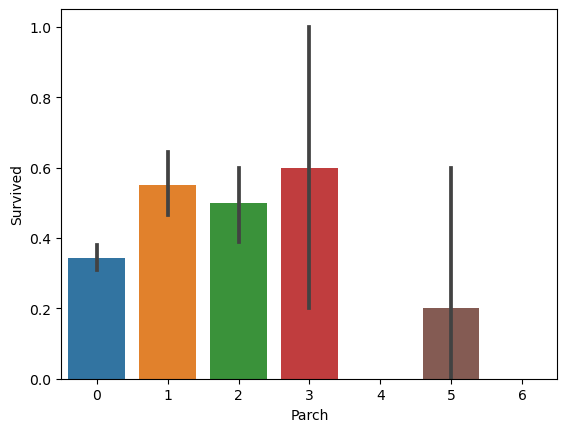

In [81]:
sns.barplot(x = 'Parch', y = 'Survived', data = train_df)